In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict, Counter

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
!pip install scikit-plot

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from collections import Counter, defaultdict

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay
)

from matplotlib.pyplot import boxplot,xticks

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold,RepeatedStratifiedKFold, cross_val_score, KFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

##UTILITIES

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.datasets import make_imbalance
from collections import defaultdict
from yellowbrick.contrib.classifier import DecisionViz
from sklearn.decomposition import PCA
from itertools import product
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA as yPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

def plot_res(y_pred, y_score, y_test):
    #ROC CURVE: implementazione legata esclusivamente all'attività di classificazione binaria
    #false positive rate, true positive rate
    print("****** ROC CURVE + AUC?: passo passo *******")


    # Genera alcuni dati di esempio per tre classi
    n_classes = 8


    # Binariaza le etichette
    y_true_bin = label_binarize(y_test, classes=np.arange(n_classes))

    # Calcola la curva ROC aggregata
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    # Plotta la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
            label='Curva ROC (AUC = {0:0.2f})'
            ''.format(roc_auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Linea di riferimento diagonale
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasso di falsi positivi')
    plt.ylabel('Tasso di veri positivi')
    plt.title('Curva ROC per la classificazione multi-classe')
    plt.legend(loc="lower right")
    plt.show()

    print("____________________________________")
    print("****** VALORE DI AUC *******")
    print("____________________________________")
    print("****** VALORE DI AUC *******")
    micro_roc_auc_ovr = roc_auc_score(
        y_test,
        y_score,
        multi_class="ovr",
        average="micro",
)

    print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

    print("____________________________________")
    print("****** ROC CURVE: con metodo diretto *******")
    plot_roc(y_test, y_score)
    plt.show()

    print("____________________________________")
    print("****** Precision recall: con metodo diretto *******")
    plot_precision_recall(y_test, y_score)
    plt.show()

In [ ]:
def print_confMatrix(y_test,y_test_pred):
    cm=confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Greens")
    plt.show()

In [ ]:
df_train=pd.read_csv("ravdess_train.csv")
df_test=pd.read_csv("Ravdess_test.csv")

In [ ]:
df_train

,Vocal_channel_,Emotion,Emotional_intensity,Statement,Repetition,Sex,mean,q50,q75,kur,...,sc_q99_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_q05_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,actor
0,1,5,0,1,0,1,0.018034,-0.063106,-0.76930,0.553248,...,1.332275,11.020083,-4.354785,0.161158,2.167997,0.690192,0.036057,9.400360,-3.035005,1
1,1,5,0,1,1,1,0.013950,-0.063106,-0.76930,0.770118,...,1.315989,-0.107613,-0.659640,-0.173413,1.610931,0.409754,0.036057,-0.186504,0.434538,1
2,1,5,0,0,0,1,0.018855,-0.063106,-0.76930,0.851346,...,1.369021,7.023345,-3.086640,-0.286208,1.285119,0.722854,0.036057,2.891302,-1.463754,1
3,1,5,0,0,1,1,0.018087,-0.063106,-0.76930,1.562804,...,1.206493,-0.211628,-0.396009,-0.588962,1.176485,0.560400,0.036057,-0.049566,-0.052845,1
4,1,1,0,1,0,1,0.015921,-0.063106,-0.76930,0.286970,...,1.361250,-0.040910,-0.624456,0.170902,1.346235,0.452031,0.036057,0.878701,-0.532241,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,1,7,0,0,1,0,-0.019175,-0.063106,-0.74864,-0.713004,...,1.296552,0.333745,-1.106246,-0.612427,-1.198817,0.647428,0.036057,1.054354,-1.526104,18
1824,1,7,1,1,0,0,-0.016770,-0.063106,-0.74864,-0.237333,...,1.376251,0.352433,-0.901054,-0.871550,-1.198817,0.734806,0.036057,-0.389173,-0.504115,18
1825,1,7,1,1,1,0,-0.025751,-0.063106,-0.74864,-0.806583,...,1.421183,1.039254,-1.106898,-0.894085,-0.618677,0.624605,0.036057,-0.130100,-0.454243,18
1826,1,7,1,0,0,0,-0.009914,-0.063106,-0.70732,-1.013416,...,1.305472,-0.074024,-0.732249,-0.424644,-1.198817,0.343780,0.036057,0.072917,-1.058564,18


In [ ]:
df_test_new=df_test.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
df_test_new

In [ ]:
attributes1=[col for col in df_train.columns if col !="Emotion"]
attributes2=[col for col in df_test.columns if col !="Emotion"]
#con questo codice si creano due colonne dai due dataframe 'df_train' e 'df_test',
#escludendo la colonna 'emotion' da entrambi i dataframe. Il 'col for col...' è chiamata
#'list comprehension' in python Significa che stai creando una nuova lista selezionando gli
#elementi dalla lista df_train.columns (cioè i nomi delle colonne del DataFrame df_train) che soddisfano
#la condizione col!='emotion', quindi vengono selezionati solo i nomi delle colonne che
#non sono 'emotion'

In [ ]:
X_train=df_train[attributes1].values
#Questa linea di codice estrae le feature (attributi) del set di dati di addestramento df_train, utilizzando l'elenco
#degli attributi specificato nella variabile attributes1. Le feature sono quindi convertite in un array numpy con il metodo .values
#e memorizzate nella variabile X_train.
y_train=np.array(df_train["Emotion"])
#Questa linea di codice estrae la variabile target (etichetta di classe) del set di dati di addestramento df_train,
#utilizzando la colonna chiamata "Emotion". La variabile target è quindi convertita in un array numpy e memorizzata
#nella variabile y_train.
X_test=df_test[attributes2].values
#Questa linea di codice estrae le feature del set di dati di test df_test, utilizzando l'elenco degli attributi
#specificato nella variabile attributes2. Le feature sono quindi convertite in un array numpy e memorizzate nella
#variabile X_test.
y_test=np.array(df_test["Emotion"])
#: Questa linea di codice estrae la variabile target del set di dati di test df_test, utilizzando la colonna chiamata
#"Emotion". La variabile target è quindi convertita in un array numpy e memorizzata nella variabile y_test.

X_train.shape, y_train.shape, X_test.shape, y_test.shape
#questa linea di codice restituisce le dimensioni degli array sopra citati e viene fatto per verificare che i dati di
#addestramento e di test siano stati estratti correttamente e che siano coerenti tra loro.

((1828, 162), (1828,), (624, 162), (624,))

In [ ]:
def result_pred(y_true, y_pred):
    print("**** Matrice di Confusione *****")
    # Calcola la matrice di confusione
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Plotta la matrice di confusione
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
    plt.title("Matrice di confusione")
    plt.xlabel("Etichetta predetta")
    plt.ylabel("Etichetta vera")
    plt.show()


    # Calcolo dell'accuracy
    print("***** Calcolo dell'accuracy *****")
    accuracy = accuracy_score(y_true, y_pred)
    print('Accuracy: %0.4f' % accuracy)
    print("____________________________________________")

    # Calcolo della precision
    print("**** Calcolo della precisione *****")
    #Percentuale di classificazioni positive che sono corrette
    #se dico "positivo" dico giusto?
    precision = precision_score(y_true, y_pred, average ="macro")
    print('Percentuale di classificazioni positive che sono corrette: %0.4f' % precision)
    print("____________________________________________")

    # Calcolo della recall
    print("**** Calcolo della recall (sensitivity) *****")
    recall = recall_score(y_true, y_pred, average="macro")
    print('Percentuale di elementi positivi del testing set che sono stati classificati come positivi: %0.4f' % recall)
    print("____________________________________________")

    # Calcolo della specificity
    print("**** Calcolo della specificity *****")
   # Calcola la matrice di confusione
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Calcola la specificità per ciascuna classe
    specificity_scores = []
    for i in range(n_classes):
        tn = np.sum(np.delete(np.delete(confusion_mat, i, axis=0), i, axis=1))
        fp_fn = np.sum(np.delete(confusion_mat, i, axis=0)[:, i]) + np.sum(confusion_mat[i, np.arange(n_classes) != i])
        specificity = tn / (tn + fp_fn)
        specificity_scores.append(specificity)

    # Stampa la specificità per ciascuna classe
    print("Specificità per classe:")
    for i, specificity in enumerate(specificity_scores):
        print("Classe {}: {:.2f}".format(i, specificity))
        print('Percentuale di elementi negativi del testing set che sono stati classificati come negativi: %0.4f' % specificity)
        print("-----")

    # Calcolo dell'F1 score
    print("**** Calcolo della F1 score *****")
    f1 = f1_score(y_true, y_pred, average="macro")
    #Il punteggio F1 può essere interpretato come una media ponderata della precisione e della recall,
    #in cui un punteggio F1 raggiunge il suo valore migliore a 1 e il punteggio peggiore a 0.
    print('F1 scores: %0.4f' % f1)
    print("____________________________________________")

    # Stampiamo le stesse statistiche dalla funzione report
    print(classification_report(y_test, y_pred))

    print("Con le tecniche viste finora non viene fornita nessuna informazione sulla “gravità” degli errori (“errore lieve” oppure “errore grave)")
    print("per questo si usano la curva CMC, la curva ROC")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

def plot_res(y_pred, y_score, y_test):
    #ROC CURVE: implementazione legata esclusivamente all'attività di classificazione binaria
    #false positive rate, true positive rate
    print("****** ROC CURVE + AUC?: passo passo *******")


    # Genera alcuni dati di esempio per tre classi
    n_classes = 8


    # Binariaza le etichette
    y_true_bin = label_binarize(y_test, classes=np.arange(n_classes))

    # Calcola la curva ROC aggregata
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    # Plotta la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
            label='Curva ROC (AUC = {0:0.2f})'
            ''.format(roc_auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Linea di riferimento diagonale
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasso di falsi positivi')
    plt.ylabel('Tasso di veri positivi')
    plt.title('Curva ROC per la classificazione multi-classe')
    plt.legend(loc="lower right")
    plt.show()

    print("____________________________________")
    print("****** VALORE DI AUC *******")
    print("____________________________________")
    print("****** VALORE DI AUC *******")
    micro_roc_auc_ovr = roc_auc_score(
        y_test,
        y_score,
        multi_class="ovr",
        average="micro",
)

    print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

    print("____________________________________")
    print("****** ROC CURVE: con metodo diretto *******")
    plot_roc(y_test, y_score)
    plt.show()

    print("____________________________________")
    print("****** Precision recall: con metodo diretto *******")
    plot_precision_recall(y_test, y_score)
    plt.show()

##GRADIENT BOOSTING

In simple terms, GradientBoostingClassifier is a machine learning algorithm that builds a predictive model for data classification. The model uses a set of decision trees, where each tree tries to correct the errors of the previous model. In this way, the overall model constantly improves its ability to correctly classify data. The model training process involves optimizing two loss functions, which are essentially ways to measure how well the model is able to classify data. The GradientBoostingClassifier model is known to be very powerful, but can take longer training than other classification models.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
%%time

params= {
    'loss' : ["log_loss"],
    'learning_rate' : [ 0.1,0.6,1.1],
    'n_estimators': [100 , 200],
    'subsample' : [ 0.5 ,1.0 ]}

clf = GradientBoostingClassifier()
obj=RandomizedSearchCV(clf, params, random_state=0)
search= obj.fit(X_train, y_train)
search.best_params_

In [ ]:
clf = GradientBoostingClassifier(loss= "log_loss", learning_rate=0.1, n_estimators=200, subsample=0.5)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5096153846153846
F1-score [0.6784141  0.58638743 0.53658537 0.42528736 0.4120603  0.54761905
 0.42222222 0.43243243]
              precision    recall  f1-score   support

           0       0.59      0.80      0.68        96
           1       0.59      0.58      0.59        96
           2       0.65      0.46      0.54        48
           3       0.47      0.39      0.43        96
           4       0.40      0.43      0.41        96
           5       0.64      0.48      0.55        48
           6       0.45      0.40      0.42        96
           7       0.38      0.50      0.43        48

    accuracy                           0.51       624
   macro avg       0.52      0.50      0.51       624
weighted avg       0.51      0.51      0.51       624



****** ROC CURVE + AUC?: passo passo *******


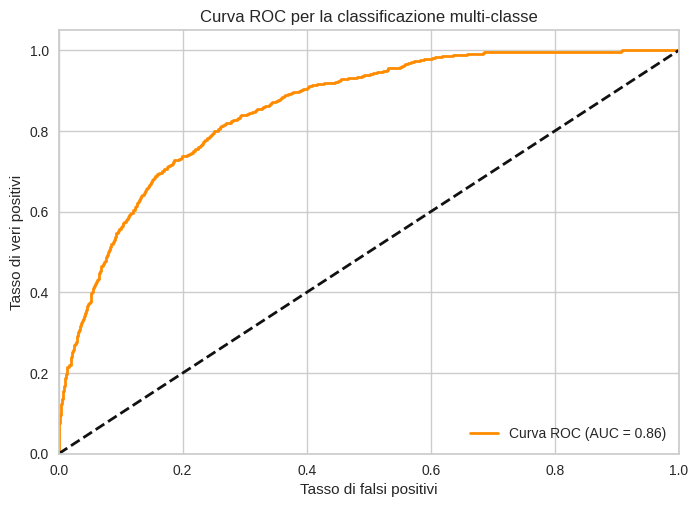

____________________________________
****** VALORE DI AUC *******
____________________________________
****** VALORE DI AUC *******
Micro-averaged One-vs-Rest ROC AUC score:
0.86
____________________________________
****** ROC CURVE: con metodo diretto *******


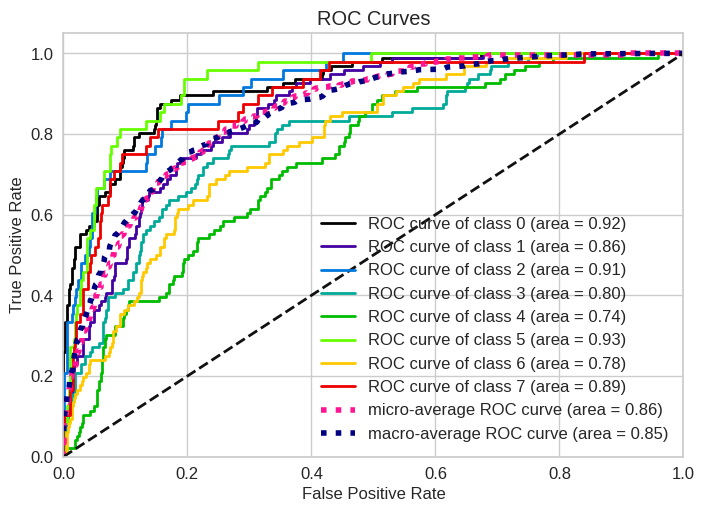

____________________________________
****** Precision recall: con metodo diretto *******


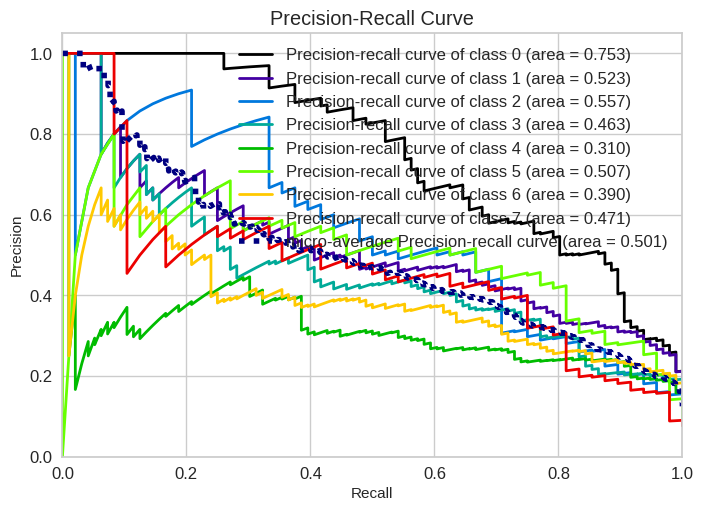

In [ ]:
y_score = clf.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

In [ ]:
clf = GradientBoostingClassifier(loss= "log_loss", learning_rate=0.1, n_estimators=200, subsample=0.5)
clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
train_acc=accuracy_score(y_train, y_train_pred)
print("Accuracy sul training", train_acc)
error_train=(1-train_acc)
print("L'errore sul train ottenuto equivale a: %", error_train)
print("______________________________________")



print()

clf = GradientBoostingClassifier(loss= "log_loss", learning_rate=0.1, n_estimators=200, subsample=0.5)
clf.fit(X_test, y_test)
y_test_pred=clf.predict(X_test)
test_acc=accuracy_score(y_test, y_test_pred)
print("Accuracy sul test", test_acc)
error_test=(1-test_acc)
print("L'errore sul train ottenuto equivale a: %", error_test)

Accuracy sul training 1.0
L'errore sul train ottenuto equivale a: % 0.0
______________________________________

Accuracy sul test 1.0
L'errore sul train ottenuto equivale a: % 0.0


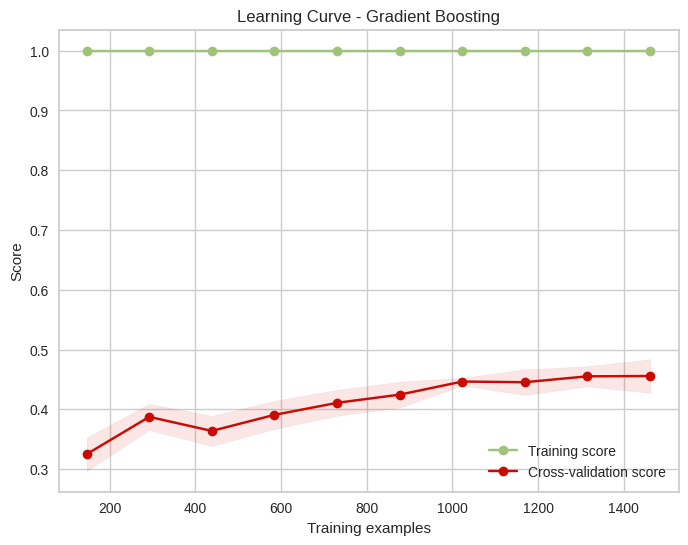

In [ ]:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Gradient Boosting')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

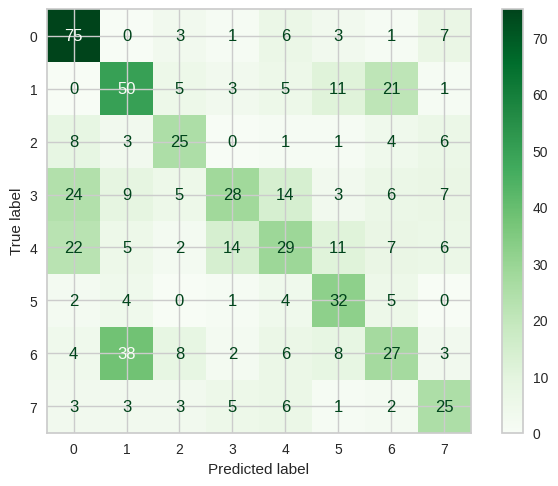

In [ ]:
print_confMatrix(y_test, y_pred)

# GRADIEN + UNDERSAMPLING


1.   RandomUndersampler
2.   Condensed
3.   Tomek



In [ ]:
!pip install imblearn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, TomekLinks

In [ ]:
rus=RandomUnderSampler()
X_res, y_res= rus.fit_resample(X_train,y_train)
Counter(y_res)

Counter({0: 140, 1: 140, 2: 140, 3: 140, 4: 140, 5: 140, 6: 140, 7: 140})

In [ ]:
clf1=GradientBoostingClassifier()
clf1.fit(X_res, y_res)
y_pred=clf1.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1-score: ", f1_score(y_test, y_pred, average=None))
print(classification_report(y_pred, y_test))

Accuracy:  0.48878205128205127
F1-score:  [0.66990291 0.51933702 0.57142857 0.43636364 0.32727273 0.51315789
 0.375      0.47933884]
              precision    recall  f1-score   support

           0       0.72      0.63      0.67       110
           1       0.49      0.55      0.52        85
           2       0.58      0.56      0.57        50
           3       0.38      0.52      0.44        69
           4       0.28      0.39      0.33        69
           5       0.81      0.38      0.51       104
           6       0.31      0.47      0.38        64
           7       0.60      0.40      0.48        73

    accuracy                           0.49       624
   macro avg       0.52      0.49      0.49       624
weighted avg       0.55      0.49      0.50       624



****** ROC CURVE + AUC?: passo passo *******


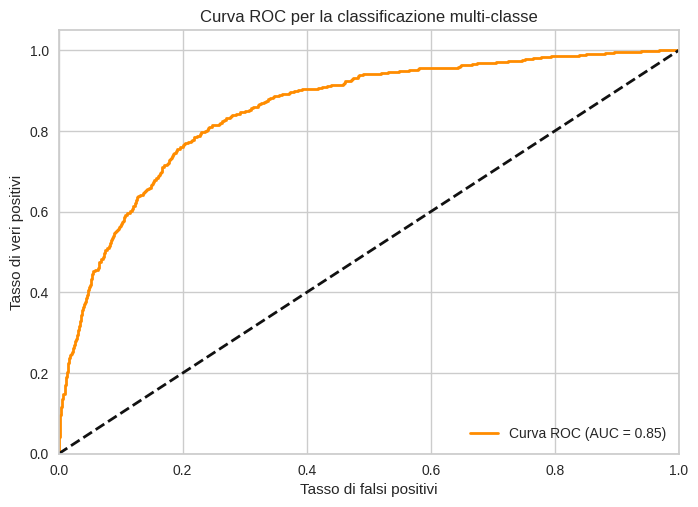

____________________________________
****** VALORE DI AUC *******
____________________________________
****** VALORE DI AUC *******
Micro-averaged One-vs-Rest ROC AUC score:
0.85
____________________________________
****** ROC CURVE: con metodo diretto *******


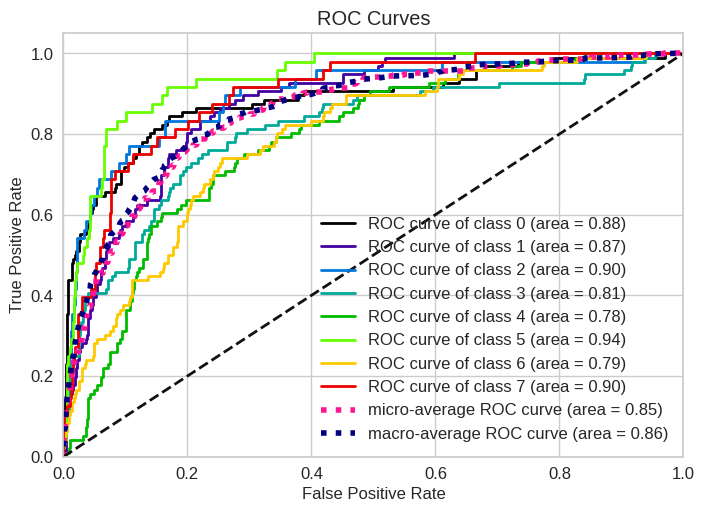

____________________________________
****** Precision recall: con metodo diretto *******


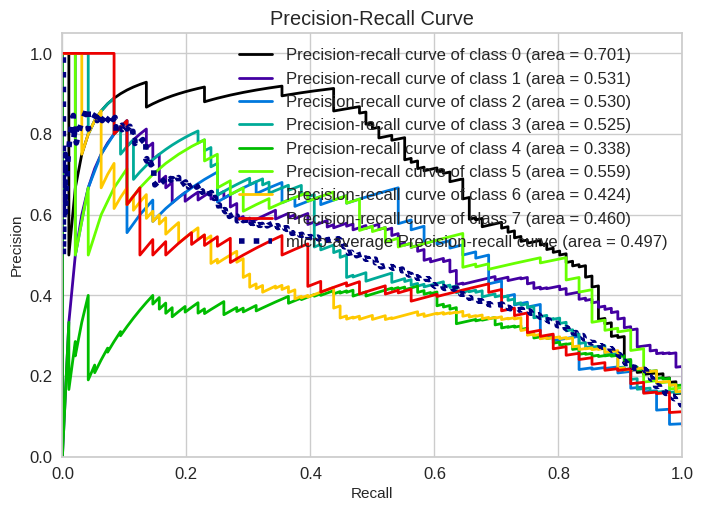

In [ ]:
y_score = clf1.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

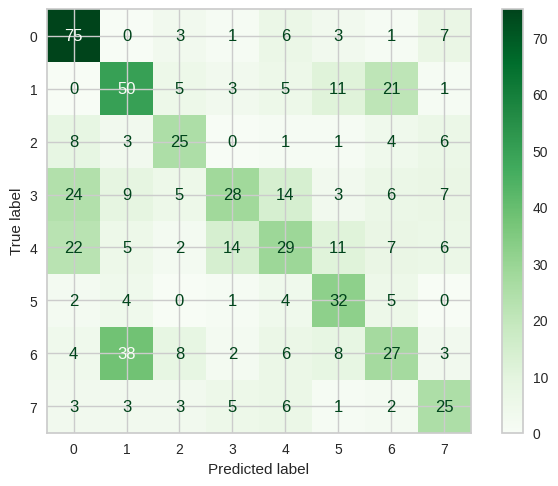

In [ ]:
print_confMatrix(y_test, y_pred)

LEARNING CURVE

In [ ]:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    clf1, X_res, y_res, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Gradient Boosting')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

In [ ]:
rus=CondensedNearestNeighbour()
X_res, y_res= rus.fit_resample(X_train,y_train)
Counter(y_res)

Counter({0: 78, 1: 112, 2: 60, 3: 86, 4: 113, 5: 140, 6: 121, 7: 54})

In [ ]:
clf2=GradientBoostingClassifier()
clf2.fit(X_res, y_res)
y_pred=clf2.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1-score: ", f1_score(y_test, y_pred, average=None))
print(classification_report(y_pred, y_test))

Accuracy:  0.4358974358974359
F1-score:  [0.59487179 0.45714286 0.41463415 0.3190184  0.33333333 0.47619048
 0.43478261 0.47524752]
              precision    recall  f1-score   support

           0       0.60      0.59      0.59        99
           1       0.42      0.51      0.46        79
           2       0.35      0.50      0.41        34
           3       0.27      0.39      0.32        67
           4       0.39      0.29      0.33       126
           5       0.62      0.38      0.48        78
           6       0.42      0.45      0.43        88
           7       0.50      0.45      0.48        53

    accuracy                           0.44       624
   macro avg       0.45      0.45      0.44       624
weighted avg       0.45      0.44      0.44       624



In [ ]:
rus=TomekLinks()
X_res, y_res= rus.fit_resample(X_train,y_train)
Counter(y_res)

Counter({5: 140, 1: 250, 4: 253, 6: 243, 0: 260, 3: 257, 2: 125, 7: 120})

In [ ]:
clf3=GradientBoostingClassifier()
clf3.fit(X_res, y_res)
y_pred=clf3.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1-score: ", f1_score(y_test, y_pred, average=None))
print(classification_report(y_pred, y_test))

Accuracy:  0.4807692307692308
F1-score:  [0.63348416 0.56382979 0.51764706 0.48       0.37569061 0.38926174
 0.3875     0.42696629]
              precision    recall  f1-score   support

           0       0.73      0.56      0.63       125
           1       0.55      0.58      0.56        92
           2       0.46      0.59      0.52        37
           3       0.44      0.53      0.48        79
           4       0.35      0.40      0.38        85
           5       0.60      0.29      0.39       101
           6       0.32      0.48      0.39        64
           7       0.40      0.46      0.43        41

    accuracy                           0.48       624
   macro avg       0.48      0.49      0.47       624
weighted avg       0.52      0.48      0.48       624



#GRADIENT + OVERSAMPLING


In [ ]:
from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE

In [ ]:
rus=RandomOverSampler()
X_res, y_res= rus.fit_resample(X_train,y_train)
Counter(y_res)

Counter({5: 280, 1: 280, 4: 280, 6: 280, 0: 280, 3: 280, 2: 280, 7: 280})

In [ ]:
clf4=GradientBoostingClassifier()
clf4.fit(X_res, y_res)

y_pred=clf4.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1-score: ", f1_score(y_test, y_pred, average=None))
print(classification_report(y_pred, y_test))

Accuracy:  0.5208333333333334
F1-score:  [0.66367713 0.56084656 0.57446809 0.45679012 0.38095238 0.56451613
 0.44067797 0.5045045 ]
              precision    recall  f1-score   support

           0       0.77      0.58      0.66       127
           1       0.55      0.57      0.56        93
           2       0.56      0.59      0.57        46
           3       0.39      0.56      0.46        66
           4       0.33      0.44      0.38        72
           5       0.73      0.46      0.56        76
           6       0.41      0.48      0.44        81
           7       0.58      0.44      0.50        63

    accuracy                           0.52       624
   macro avg       0.54      0.52      0.52       624
weighted avg       0.56      0.52      0.53       624



****** ROC CURVE + AUC?: passo passo *******


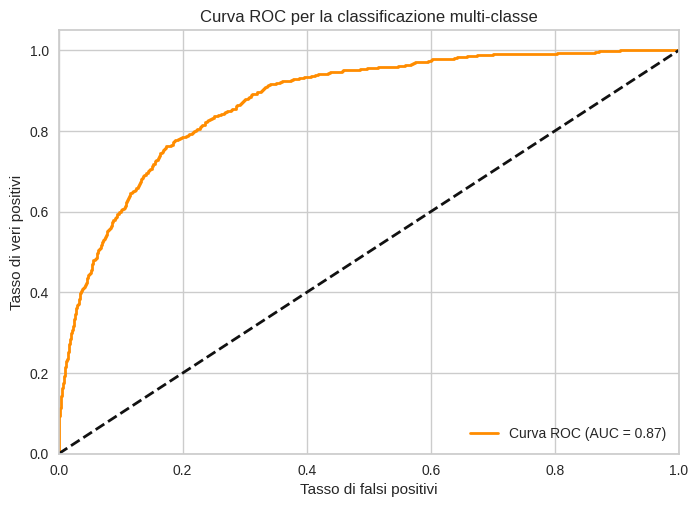

____________________________________
****** VALORE DI AUC *******
____________________________________
****** VALORE DI AUC *******
Micro-averaged One-vs-Rest ROC AUC score:
0.87
____________________________________
****** ROC CURVE: con metodo diretto *******


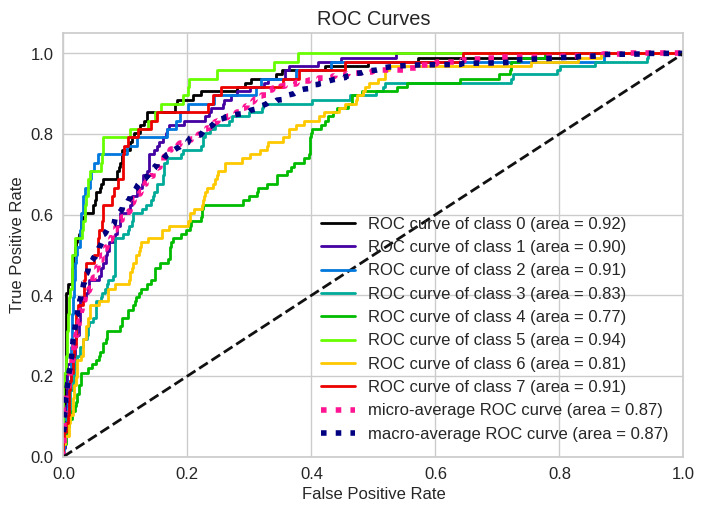

____________________________________
****** Precision recall: con metodo diretto *******


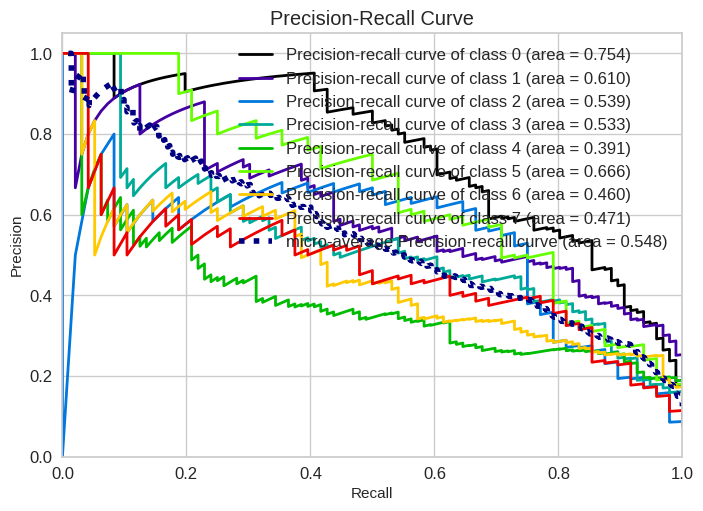

In [ ]:
y_score = clf4.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

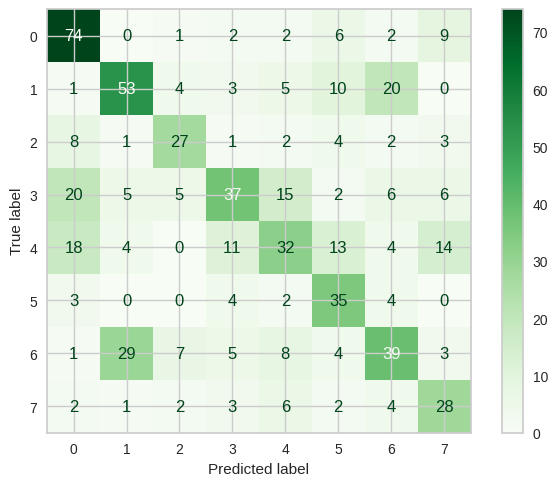

In [ ]:
print_confMatrix(y_test, y_pred)

In [ ]:

from sklearn.model_selection import learning_curve
# Calcola la learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf4, X_res, y_res, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcola le medie e gli errori standard delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotta la learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Gradient Boosting')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

In [ ]:
rus=ADASYN()
X_res, y_res= rus.fit_resample(X_train,y_train)
Counter(y_res)

Counter({5: 291, 1: 280, 4: 280, 6: 280, 0: 280, 3: 280, 2: 276, 7: 287})

In [ ]:
clf5=GradientBoostingClassifier()
clf5.fit(X_res, y_res)
y_pred=clf5.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1-score: ", f1_score(y_test, y_pred, average=None))
print(classification_report(y_pred, y_test))

Accuracy:  0.46634615384615385
F1-score:  [0.65402844 0.54022989 0.45783133 0.36708861 0.26506024 0.50704225
 0.43850267 0.44094488]
              precision    recall  f1-score   support

           0       0.72      0.60      0.65       115
           1       0.49      0.60      0.54        78
           2       0.40      0.54      0.46        35
           3       0.30      0.47      0.37        62
           4       0.23      0.31      0.27        70
           5       0.75      0.38      0.51        94
           6       0.43      0.45      0.44        91
           7       0.58      0.35      0.44        79

    accuracy                           0.47       624
   macro avg       0.49      0.46      0.46       624
weighted avg       0.52      0.47      0.48       624



In [ ]:
rus=SMOTE()
X_res, y_res= rus.fit_resample(X_train,y_train)
Counter(y_res)

Counter({5: 280, 1: 280, 4: 280, 6: 280, 0: 280, 3: 280, 2: 280, 7: 280})

In [ ]:
clf6=GradientBoostingClassifier()
clf6.fit(X_res, y_res)
y_pred=clf6.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1-score: ", f1_score(y_test, y_pred, average=None))
print(classification_report(y_pred, y_test))

Accuracy:  0.4951923076923077
F1-score:  [0.68518519 0.54347826 0.4742268  0.41717791 0.32098765 0.48571429
 0.48044693 0.46728972]
              precision    recall  f1-score   support

           0       0.77      0.62      0.69       120
           1       0.52      0.57      0.54        88
           2       0.48      0.47      0.47        49
           3       0.35      0.51      0.42        67
           4       0.27      0.39      0.32        66
           5       0.71      0.37      0.49        92
           6       0.45      0.52      0.48        83
           7       0.52      0.42      0.47        59

    accuracy                           0.50       624
   macro avg       0.51      0.48      0.48       624
weighted avg       0.54      0.50      0.50       624



##HISTGRADIENT


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
params= {
    'loss' : ["log_loss"],
    'learning_rate' : [ 0.1,0.6,1.1],
    'n_estimators': [ 100 , 200],
    'tol': [ 1e-08 , 1e-10, 1e-12]
}

clf7 = GradientBoostingClassifier()
obj=RandomizedSearchCV(clf, params, random_state=0)
search= obj.fit(X_train, y_train)
search.best_params_

In [ ]:
clf7 = HistGradientBoostingClassifier(learning_rate=1.0, max_depth=3, random_state=0)
clf7.fit(X_train, y_train)

y_pred = clf7.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.19230769230769232
F1-score [0.25592417 0.27868852 0.09580838 0.10526316 0.18666667 0.22093023
 0.19213974 0.1875    ]
              precision    recall  f1-score   support

           0       0.23      0.28      0.26        96
           1       0.65      0.18      0.28        96
           2       0.07      0.17      0.10        48
           3       0.19      0.07      0.11        96
           4       0.26      0.15      0.19        96
           5       0.15      0.40      0.22        48
           6       0.17      0.23      0.19        96
           7       0.38      0.12      0.19        48

    accuracy                           0.19       624
   macro avg       0.26      0.20      0.19       624
weighted avg       0.28      0.19      0.20       624



****** ROC CURVE + AUC?: passo passo *******


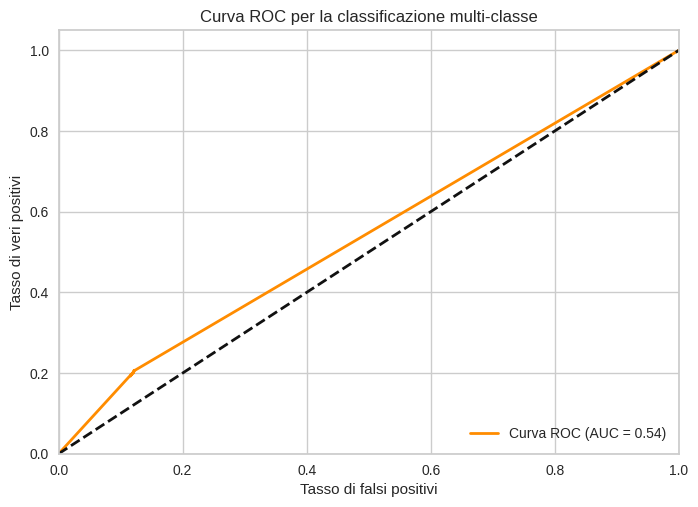

____________________________________
****** VALORE DI AUC *******
____________________________________
****** VALORE DI AUC *******
Micro-averaged One-vs-Rest ROC AUC score:
0.54
____________________________________
****** ROC CURVE: con metodo diretto *******


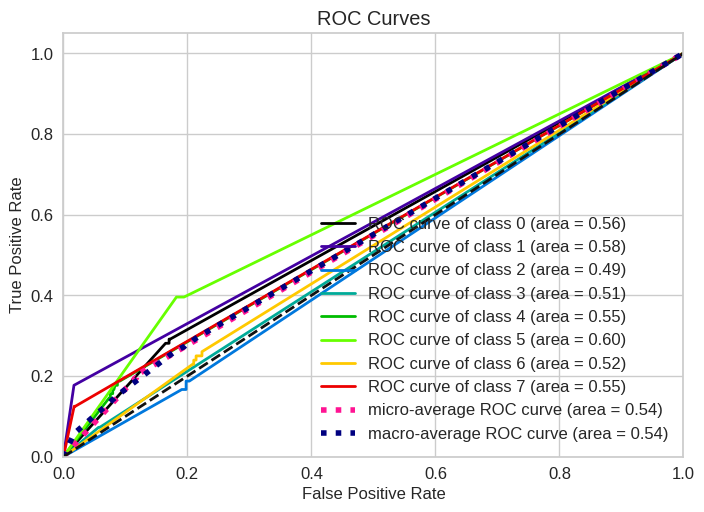

____________________________________
****** Precision recall: con metodo diretto *******


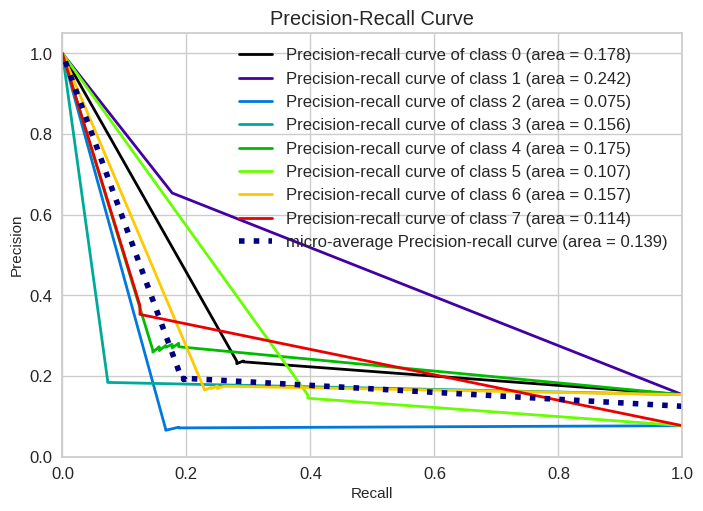

In [ ]:
y_score = clf7.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

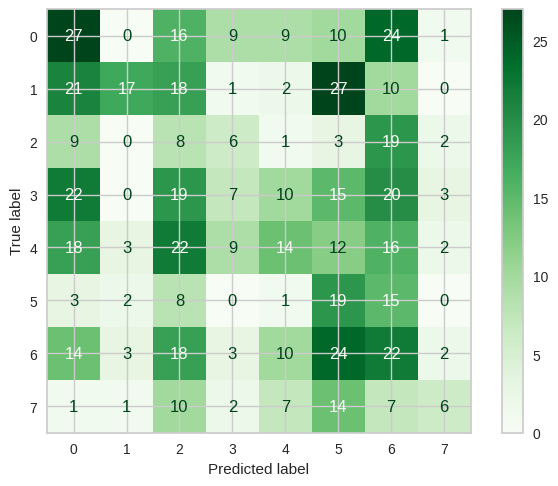

In [ ]:
print_confMatrix(y_test, y_pred)

In [ ]:

from sklearn.model_selection import learning_curve
# Calcola la learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf7, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcola le medie e gli errori standard delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotta la learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Gradient Boosting')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

HistGradientBoostingClassifier refers to the use of an optimized version of the gradient boosting algorithm that uses the histogram to store information related to the distribution of characteristics, instead of using a set of subdivision rules based on the real distribution of characteristics. This approach significantly reduces computational time and the amount of memory required for model training, without compromising performance.

##XGBOOST

XGBoost is a very powerful machine learning algorithm that can be used to address a wide range of classification and regression problems, and is particularly effective when working with large, high-dimensional data.


In [ ]:
from xgboost import XGBClassifier

In [ ]:
params= {
    'loss' : ["log_loss"],
    'learning_rate' : [ 0.1,0.6,1.1],
    'n_estimators': [ 100 , 200],
    'tol': [ 1e-08 , 1e-10, 1e-12]
}

clf = XGBClassifier()
obj=RandomizedSearchCV(clf, params, random_state=0)
search= obj.fit(X_train, y_train)
search.best_params_

[10:09:39] WARNING: ../src/learner.cc:767: 
Parameters: { "loss", "tol" } are not used.

[10:10:13] WARNING: ../src/learner.cc:767: 
Parameters: { "loss", "tol" } are not used.

[10:10:41] WARNING: ../src/learner.cc:767: 
Parameters: { "loss", "tol" } are not used.

[10:11:11] WARNING: ../src/learner.cc:767: 
Parameters: { "loss", "tol" } are not used.

[10:11:40] WARNING: ../src/learner.cc:767: 
Parameters: { "loss", "tol" } are not used.

[10:12:10] WARNING: ../src/learner.cc:767: 
Parameters: { "loss", "tol" } are not used.

[10:12:23] WARNING: ../src/learner.cc:767: 
Parameters: { "loss", "tol" } are not used.



KeyboardInterrupt: ignored

In [ ]:
clf8 = XGBClassifier(objective='binary:logistic',
                    max_depth = 6,
                    learning_rate = 1.0,
                    gamma = 0.0,
                    reg_lambda = 1,
                    tree_method='exact', # 'approx'
                    use_label_encoder=False,
                    random_state=42
                   )

clf8.fit(X_train, y_train)

y_pred = clf8.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy 0.46634615384615385
F1-score [0.64102564 0.48076923 0.50505051 0.37333333 0.34730539 0.54237288
 0.31952663 0.48543689]
              precision    recall  f1-score   support

           0       0.54      0.78      0.64        96
           1       0.45      0.52      0.48        96
           2       0.49      0.52      0.51        48
           3       0.52      0.29      0.37        96
           4       0.41      0.30      0.35        96
           5       0.46      0.67      0.54        48
           6       0.37      0.28      0.32        96
           7       0.45      0.52      0.49        48

    accuracy                           0.47       624
   macro avg       0.46      0.49      0.46       624
weighted avg       0.46      0.47      0.45       624



****** ROC CURVE + AUC?: passo passo *******


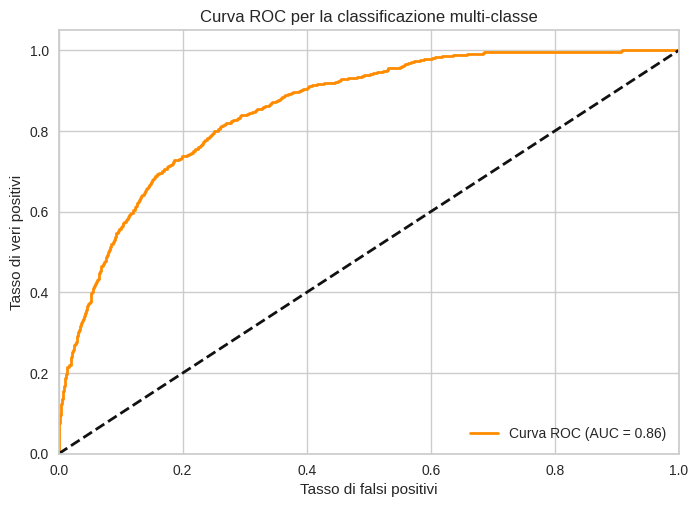

____________________________________
****** VALORE DI AUC *******
____________________________________
****** VALORE DI AUC *******
Micro-averaged One-vs-Rest ROC AUC score:
0.86
____________________________________
****** ROC CURVE: con metodo diretto *******


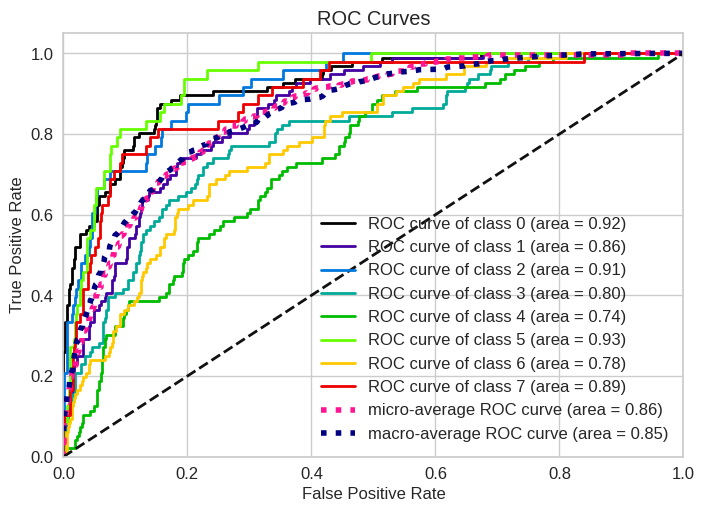

____________________________________
****** Precision recall: con metodo diretto *******


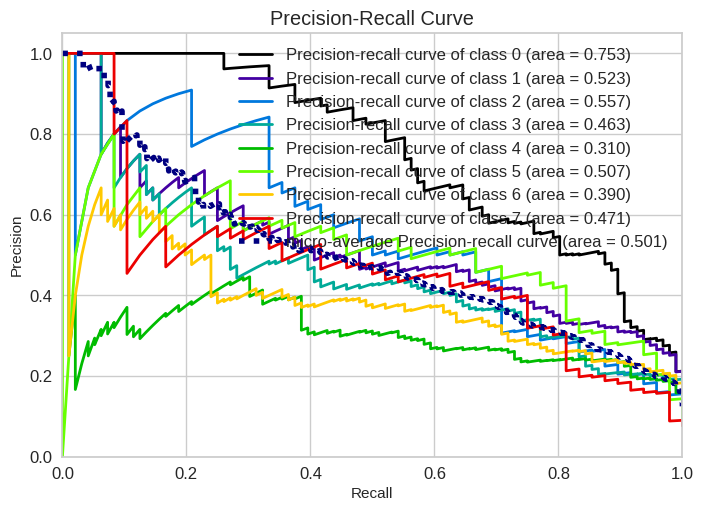

In [ ]:
y_score = clf8.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

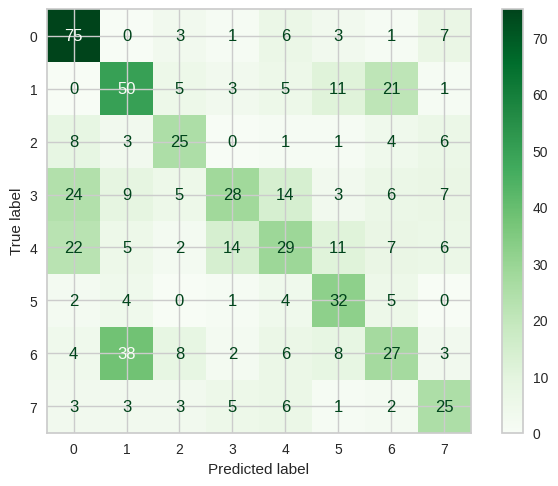

In [ ]:
print_confMatrix(y_test, y_pred)

LEARNING CURVE

In [ ]:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    clf8, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Random Forest')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

#LIGHT GBM

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
clf9 = LGBMClassifier(boosting_type='gbdt',  #'goss', #'dart'
                     max_depth=-1, # no limit
                     num_leaves=31,
                     n_estimators=100,
                     subsample_for_bin=200000,
                     objective='binary',
                     reg_alpha=0.0, #L1 regularization term on weights
                     reg_lambda=0.0, #L2 regularization term on weights
                     random_state=42
                   )

clf9.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.46634615384615385
F1-score [0.64102564 0.48076923 0.50505051 0.37333333 0.34730539 0.54237288
 0.31952663 0.48543689]
              precision    recall  f1-score   support

           0       0.54      0.78      0.64        96
           1       0.45      0.52      0.48        96
           2       0.49      0.52      0.51        48
           3       0.52      0.29      0.37        96
           4       0.41      0.30      0.35        96
           5       0.46      0.67      0.54        48
           6       0.37      0.28      0.32        96
           7       0.45      0.52      0.49        48

    accuracy                           0.47       624
   macro avg       0.46      0.49      0.46       624
weighted avg       0.46      0.47      0.45       624



****** ROC CURVE + AUC?: passo passo *******


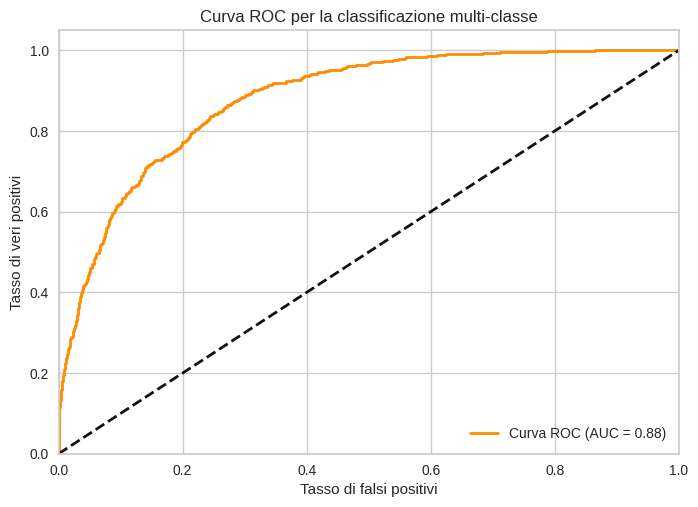

____________________________________
****** VALORE DI AUC *******
____________________________________
****** VALORE DI AUC *******
Micro-averaged One-vs-Rest ROC AUC score:
0.88
____________________________________
****** ROC CURVE: con metodo diretto *******


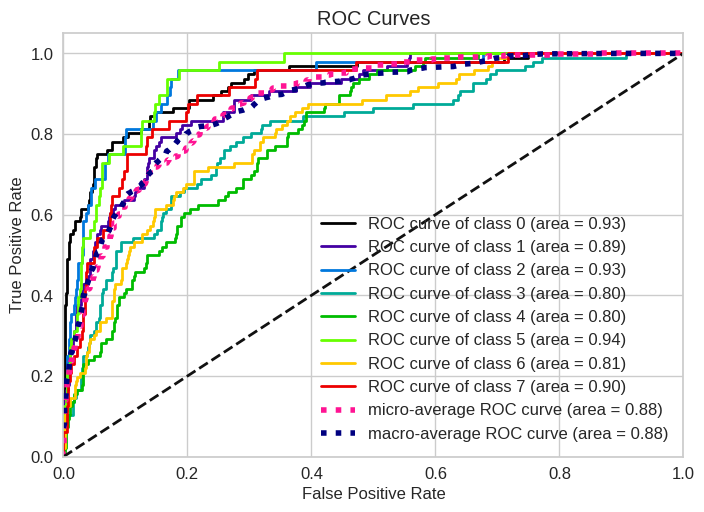

____________________________________
****** Precision recall: con metodo diretto *******


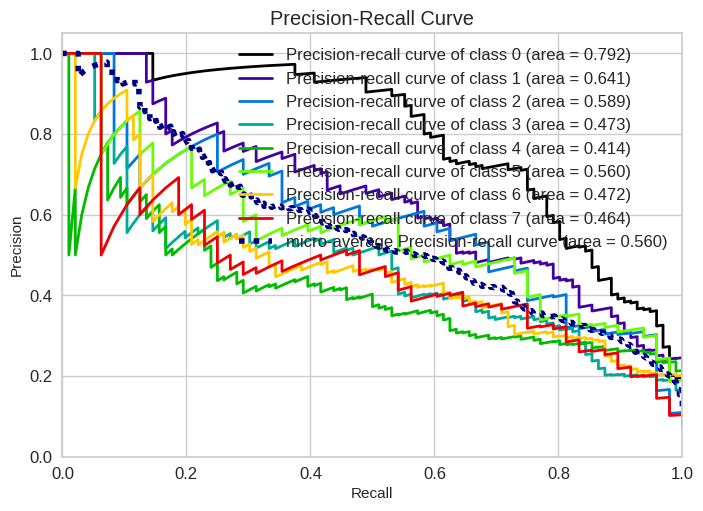

In [ ]:
y_score = clf9.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

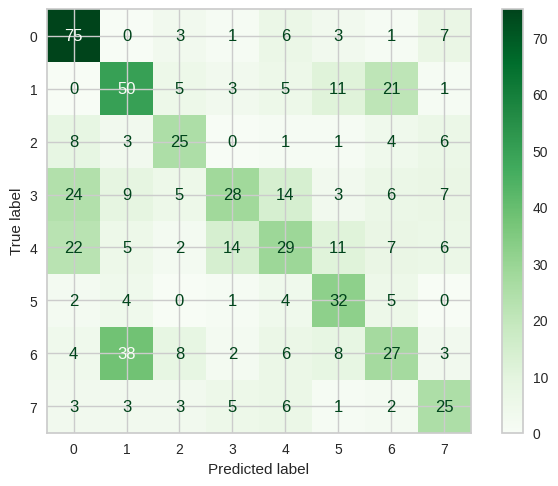

In [ ]:
print_confMatrix(y_test, y_pred)

LEARNING CURVE

In [ ]:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    clf9, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Random Forest')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

In [ ]:
clf9= LGBMClassifier(boosting_type='gbdt',  #'goss', #'dart'
                     max_depth=-1, # no limit
                     num_leaves=31,
                     n_estimators=100,
                     subsample_for_bin=200000,
                     objective='binary',
                     reg_alpha=0.0, #L1 regularization term on weights
                     reg_lambda=0.0, #L2 regularization term on weights
                     random_state=42
                   )
clf9.fit(X_train, y_train)
y_train_pred=clf9.predict(X_train)
train_acc=accuracy_score(y_train, y_train_pred)
print("Accuracy sul training", train_acc)
error_train=(1-train_acc)
print("L'errore sul train ottenuto equivale a: %", error_train)
print("______________________________________")



print()

clf9= LGBMClassifier(boosting_type='gbdt',  #'goss', #'dart'
                     max_depth=-1, # no limit
                     num_leaves=31,
                     n_estimators=100,
                     subsample_for_bin=200000,
                     objective='binary',
                     reg_alpha=0.0, #L1 regularization term on weights
                     reg_lambda=0.0, #L2 regularization term on weights
                     random_state=42
                   )
clf9.fit(X_test, y_test)
y_test_pred=clf9.predict(X_test)
test_acc=accuracy_score(y_test, y_test_pred)
print("Accuracy sul test", test_acc)
error_test=(1-test_acc)
print("L'errore sul train ottenuto equivale a: %", error_test)

CatBoostClassifier is a classification algorithm based on a boosting model to which a number of advanced features have been added, such as the use of categorical variable encoding, the automatic management of missing values and the regularization of numerical variables.
CatBoostClassifier is particularly useful for managing categorical variables, that is, variables that assume a finite number of discrete values. In fact, the model is able to automatically manage the encoding of categorical variables.